In [1]:
import pandas as pd     
import numpy as np 
import glob as glob

Base=[]
csv_files = glob.glob('Data_EAM&IPC/*.csv')

for filename in csv_files:
    if filename == "Data_EAM&IPC\\EAM_2020.csv":
        print("ok")
        data = pd.read_csv(filename,sep=",")   
    else:
        data = pd.read_csv(filename,sep=";")
      
    Base.append(data)


c:\Users\User\Documents\TrabajoGrado\env\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (299) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\User\Documents\TrabajoGrado\env\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (182,183,184,185,186,187,188,189,190,191,302) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\User\Documents\TrabajoGrado\env\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,2

ok


In [2]:
EAM08,EAM09,EAM10,EAM11,EAM12,EAM13,EAM14,EAM15,EAM16,EAM17,EAM18,EAM19,EAM20 = Base
#Assign each dataframe a variable of the "Base"
Data_Merge = [EAM08,EAM09,EAM10,EAM11,EAM12,EAM13,EAM14,EAM15,EAM16,EAM17,EAM18,EAM19,EAM20]
#Create a list of the dataframe
EAM08_G,EAM09_G,EAM10_G,EAM11_G,EAM12_G,EAM13_G,EAM14_G, \
            EAM15_G,EAM16_G,EAM17_G,EAM18_G,EAM19_G,EAM20_G=\
                0,0,0,0,0,0,0,0,0,0,0,0,0
Data_Gruop = [EAM08_G,EAM09_G,EAM10_G,EAM11_G,EAM12_G,EAM13_G,EAM14_G, \
            EAM15_G,EAM16_G,EAM17_G,EAM18_G,EAM19_G,EAM20_G]

In [3]:
#PARA CAMBIAR UN LABEL EN UNA UBICACIÓN ESPECIFICA NO ESTANDARIZADO
def change_name(Data_Merge, Number, change):
    for df in Data_Merge:
        if len(df.columns) > Number: #Verificar si el dataframe tiene al menos 4 columnas
            df.columns.values[Number] = change #Me cambia el name de el label 
    return Data_Merge

In [4]:
#Para estandairzar los labels
def change_label(Data_Merge):
    for df in Data_Merge:
        columnas = df.columns.tolist() #Crea una lista de columnas
        nuevas_columnas = [columna.upper() for columna in columnas] # coloca en mayusculas cada columna de lista
        df.columns = nuevas_columnas #Asigna el nuevo nombre
    return Data_Merge

In [5]:
#Función para saber si una columna esta presente en un dataframe
def Exis(Data_Merge, item):
    for i, df in enumerate(Data_Merge):
        if item not in df.columns:
            columna_ausente = True
            print(f"El item no está presente en el DataFrame {i}.")
        else:
            columna_ausente = False
            print(f"El item  está presente en el DataFrame {i}.")
    return columna_ausente

In [6]:
#Función para saber si existen datos faltantes en la columna
def exis_colum(Data_Merge,colum):
    missing_col=0
    for i in Data_Merge:
        missing_col += i[colum].isnull().sum()
    return missing_col

In [7]:
#Función para ordenar, por una columna 
def Sort(Column,Data_Merge):
    for i, d in enumerate(Data_Merge):
        sorted_df = d.sort_values(by=Column)
        Data_Merge[i] = sorted_df 
    return Data_Merge

In [8]:
def calculate_avg_or_sum(Column, SUMATION, UBACATION, Data_Gruop, Data_Merge, operation):
    for i, df in enumerate(Data_Gruop):
        for index in df.index:
            if index in Data_Merge[i][Column].unique():
                total = Data_Merge[i][Data_Merge[i][Column] == index][SUMATION]
                if operation == 'mean':
                    total=total.mean()
                    df.loc[index, UBACATION] = total
                elif operation == 'sum':
                    total=total.sum()
                    df.loc[index, UBACATION] = total
                elif operation == 'count':
                    total=total.value_counts()           
                    df.loc[index, UBACATION] = int(total)           
                elif operation == 'coe_sim':
                    total=total.skew()  #Da como resultado el coeficiente de asimetria de fisher
                    df.loc[index, UBACATION] = total
                elif operation == "med":
                    total=total.median()
                    df.loc[index, UBACATION] = total
                elif operation =="rango":
                    total = total.max() - total.min()
                    df.loc[index, UBACATION] = total
    return Data_Gruop

In [9]:
def sum_of_rows(row,Colum1,Colum2):
    return row[Colum1] + row[Colum2]

In [10]:
def IHH(Column, Divisor, Numerator, Ubac, Data_Gruop, Data_Merge):
  for i, df in enumerate(Data_Gruop):
    for index in df.index:
      if index in Data_Merge[i][Column].unique():               
        Numerator = Data_Merge[i].set_index(Column)[Divisor]
        Denominator = df["SUM-WORKERS"]
        Total = (Numerator / Denominator) * 100
        Data_Merge[i].loc[Data_Merge[i][Column], Ubac] = Total
  return Data_Merge

In [11]:
Data_Merge = change_name(Data_Merge,3,"CIIU")

In [12]:
Data_Merge = change_label(Data_Merge)

In [13]:
exis_colum(Data_Merge,"CIIU")
exis_colum(Data_Merge,"C4R4C9T")
exis_colum(Data_Merge,"C4R4C10T")

0

In [14]:
Data_Merge=Sort("CIIU",Data_Merge)

In [15]:
#Para crear un data frame agrupado de una base de datos
for i in range (len(Data_Merge)):
    index=Data_Merge[i]["CIIU"].drop_duplicates().sort_values()
    Data_Gruop[i]= pd.DataFrame(index=index,columns=["SUM-WORKERS_M","SUM-WORKERS_F","SUM-WORKERS","MED-WAGE","IHH","Count_CIIU",'Simetria',"rango"])


In [16]:
Data_Gruop=calculate_avg_or_sum("CIIU","C4R4C9T","SUM-WORKERS_F",Data_Gruop,Data_Merge,"sum")
Data_Gruop=calculate_avg_or_sum("CIIU","C4R4C10T","SUM-WORKERS_M",Data_Gruop,Data_Merge,"sum")
Data_Gruop=calculate_avg_or_sum("CIIU","C3R2C3","MED-WAGE",Data_Gruop,Data_Merge,"med")

In [17]:
for df  in Data_Gruop:
    df["SUM-WORKERS"] = df.apply(lambda row: sum_of_rows(row,"SUM-WORKERS_M","SUM-WORKERS_F"), axis=1)

In [18]:
for df  in Data_Merge:
    df["WORKERS"] = df.apply(lambda row: sum_of_rows(row,"C4R4C10T","C4R4C9T"), axis=1) #Sumar las filas
    df["IHH_ONE"] = None

In [20]:
Data_Merge=IHH("CIIU","WORKERS","SUM-WORKERS","IHH_ONE",Data_Gruop,Data_Merge) #Aquí estoy sacando el ihh

In [21]:
Data_Gruop=calculate_avg_or_sum("CIIU","IHH_ONE","IHH",Data_Gruop,Data_Merge,"sum") ##Sumo el IHH individual

In [22]:
Data_Gruop=calculate_avg_or_sum("CIIU","CIIU","Count_CIIU",Data_Gruop,Data_Merge,"count")   ## Cuanto la cantidad de empresas que hay ´por CIIU 

In [23]:
Data_Gruop=calculate_avg_or_sum("CIIU","C3R2C3","Simetria",Data_Gruop,Data_Merge,"coe_sim")  #Miro el coeficiente de simetria

In [24]:
Data_Gruop=calculate_avg_or_sum("CIIU","C3R2C3","rango",Data_Gruop,Data_Merge,"rango")

In [25]:
for i, df in enumerate(Data_Gruop):
    df["IHH_cuadrado"] = df["IHH"] ** 2

    conditions = [
        df["IHH_cuadrado"] <= 1000,
        (1000 <= df["IHH_cuadrado"]) & (df["IHH_cuadrado"] < 1800),
        df["IHH_cuadrado"] >= 1800
    ]
    values = [1, 2, 3]

    df["IHH_resultado"] = np.select(conditions, values, default=np.nan)

    #Hay un problema y es que son 3 .-.

In [26]:
exis_colum(Data_Gruop,"IHH")

0

In [28]:
#Promedios Ponderados  -- para calcular 
#Para el salario se saca la mediana pagada por cada sector 
# Para saber si el promedio es un buen estadistico se realiza un examen de simetria
#Datos de estilizados -- Indicador: 

Se comienza a trabajar con los datos sacados por hechos estilizados

Se imprime una grafica de barras del IHH por sector para todos los años

In [29]:
def count_IHH(Grupo_datos, df,SUM):
    for i, data_frame in enumerate(Grupo_datos):
        conteo = data_frame[SUM].value_counts()
        for valor in conteo.index:
            conteo_valor = conteo.loc[valor]
            df.at[df.index[i], valor] = conteo_valor
    return df

In [30]:
def create_index(Data_Gruop):
    Index=[]
    for i in range(len(Data_Gruop)):
        w = 2008 + i 
        Index.append(w)
    return Index

In [31]:
Index = create_index(Data_Gruop)
Columns = [1, 2, 3]
df = pd.DataFrame(index=Index, columns=Columns)


,1,2,3
2008,NaN,NaN,NaN
2009,NaN,NaN,NaN
2010,NaN,NaN,NaN
2011,NaN,NaN,NaN
2012,NaN,NaN,NaN
2013,NaN,NaN,NaN
2014,NaN,NaN,NaN
2015,NaN,NaN,NaN
2016,NaN,NaN,NaN
2017,NaN,NaN,NaN


In [32]:
df=count_IHH(Data_Gruop,df,"IHH_resultado")

<Figure size 640x480 with 0 Axes>

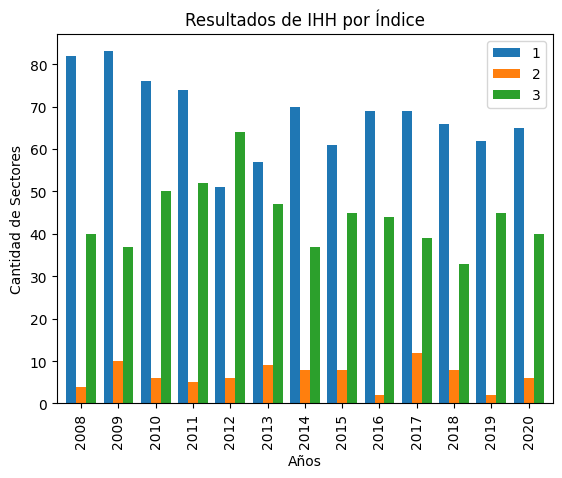

In [33]:
import matplotlib.pyplot as plt

# Crear una figura para el gráfico
plt.figure()

# Graficar los resultados de IHH_resultado con un gráfico de barras
df.plot(kind='bar', width=0.8)

# Etiquetas y título del gráfico
plt.xlabel("Años")
plt.ylabel("Cantidad de Sectores")
plt.title("Resultados de IHH por Índice")


# Mostrar el gráfico
plt.show()
#plt.savefig('grafico_Sectores.jpg', format='jpg')


Se imprime una grafica con la media  del salario medio pagado por sectores con poder y sin poder.

In [34]:
Prom = create_index(Data_Gruop)
X=['Salario_Medio']  # Acá se crea la columna vacia
Promedio_years= pd.DataFrame(index=Index, columns=X)

#Creamos un dataframe donde agrupa la mediana de cada CIIU para cada año

In [35]:
# Leer el archivo de Excel
IPC_doc = pd.read_excel("Data_EAM&IPC\\IPC.xlsx", header=0)

# Crear un DataFrame IPC a partir de los datos leídos
IPC = pd.DataFrame({'Año': IPC_doc.iloc[:, 0], 'IPC': IPC_doc.iloc[:, 1]})

Index = create_index(Data_Gruop)

# Establecer el índice del DataFrame IPC usando la lista Index
IPC.set_index('Año', inplace=True)

# Reemplazar el índice existente con la lista Index
IPC.index = Index


In [36]:
T=[]
for i in Data_Gruop:
    X = i['MED-WAGE'].median()
    T.append(X)

In [37]:
Promedio_years['Salario_Medio'] = T
Promedio_years["InflaciónIPC"] = IPC["IPC"]
Promedio_years['Salario_Real'] = (Promedio_years["Salario_Medio"]  / Promedio_years["InflaciónIPC"]) *100


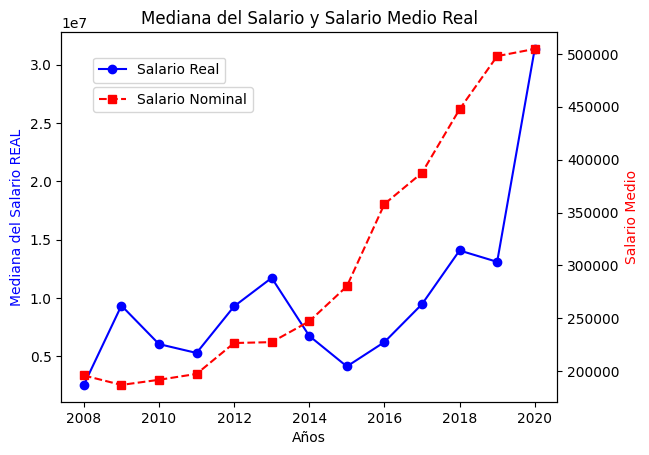

In [39]:
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame con una columna "Datos" y un índice deseado en el eje X

# Obtén los valores del índice y los datos de las columnas
x_values = Promedio_years.index
y_values_1 = Promedio_years['Salario_Real']
y_values_2 = Promedio_years['Salario_Medio']

# Crea la figura y los ejes
fig, ax1 = plt.subplots()

# Crea un segundo eje Y que comparta el mismo eje X
ax2 = ax1.twinx()

# Trazar datos en el primer eje Y
ax1.plot(x_values, y_values_1, marker='o', linestyle='-', color='b', label='Salario Real')
ax1.set_xlabel('Años')
ax1.set_ylabel('Mediana del Salario REAL', color='b')

# Trazar datos en el segundo eje Y
ax2.plot(x_values, y_values_2, marker='s', linestyle='--', color='r', label='Salario Nominal')
ax2.set_ylabel('Salario Medio', color='r')

# Agregar leyendas para las líneas
ax1.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95))
ax2.legend(loc='upper left', bbox_to_anchor=(0.05, 0.87))

# Título del gráfico
plt.title('Mediana del Salario y Salario Medio Real')

# Muestra el gráfico
plt.show()
#plt.savefig('grafico_Salario.jpg', format='jpg')


Agregar el Salario minimo y el porcentaje pagado del salario minimo por la EAM y de esa medida se puede establecer el potencial de ingresos que tiene el sector

Construcción de los hechos estilizados para el empleo

In [40]:
# Leer el archivo de Excel
import pandas as pd     
import numpy as np 
import glob as glob

csv_files_gD = glob.glob('Data_GEIH\\Desocupados\\*.[Cc][Ss][Vv]', recursive=True)
Dog_D =[]

for filename in csv_files_gD:
    if "Desocupados2008.csv" in filename:
        data_gD = pd.read_csv(filename, sep=",", encoding='latin-1', error_bad_lines=False)
    if "Desocupados2017.csv" in filename:
        data_gD = pd.read_csv(filename, sep=",", encoding='latin-1', error_bad_lines=False)
    elif "Desocupados2020.CSV" in filename:
        data_gD = pd.read_csv(filename, sep=",", encoding='latin-1', error_bad_lines=False)

    else:
        data_gD = pd.read_csv(filename,sep=";",encoding='latin-1', error_bad_lines=False)
        
    Dog_D.append(data_gD)

GEIH_D08,GEIH_D09,GEIH_D10,GEIH_D11,GEIH_D12,GEIH_D13,GEIH_D14, \
    GEIH_D15,GEIH_D16,GEIH_D17,GEIH_D18,GEIH_D19,GEIH_D20 = Dog_D
GEIH_LIST_D=[GEIH_D08,GEIH_D09,GEIH_D10,GEIH_D11,GEIH_D12,GEIH_D13,GEIH_D14, \
    GEIH_D15,GEIH_D16,GEIH_D17,GEIH_D18,GEIH_D19,GEIH_D20]

c:\Users\User\Documents\TrabajoGrado\env\lib\site-packages\IPython\core\interactiveshell.py:3553: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 1288: expected 1 fields, saw 2\n'


In [41]:
csv_files_g = glob.glob('Data_GEIH\\Ocupados\\*.[Cc][Ss][Vv]', recursive=True)
Dog =[]

for filename in csv_files_g:
    if "Ocupados2008.csv" in filename:
        data_g = pd.read_csv(filename, sep=",", encoding='latin-1', error_bad_lines=False)   
    elif "Ocupados2011.csv" in filename:
        data_g = pd.read_csv(filename, sep=",", encoding='latin-1', error_bad_lines=False)    
    elif "Ocupados2017.csv" in filename:
        data_g = pd.read_csv(filename, sep=",", encoding='latin-1', error_bad_lines=False)
    elif "Ocupados2020.CSV" in filename:
        data_g = pd.read_csv(filename, sep=",", encoding='latin-1', error_bad_lines=False)
    else:
        data_g = pd.read_csv(filename,sep=";",encoding='latin-1', error_bad_lines=False)
        
    Dog.append(data_g)

GEIH_O08,GEIH_O09,GEIH_O10,GEIH_O11,GEIH_O12,GEIH_O13,GEIH_O14,GEIH_O15,GEIH_O16,GEIH_O17,GEIH_O18,GEIH_O19,GEIH_O20 = Dog
GEIH_LIST_O=[GEIH_O08,GEIH_O09,GEIH_O10,GEIH_O11,GEIH_O12,GEIH_O13,GEIH_O14,
    GEIH_O15,GEIH_O16,GEIH_O17,GEIH_O18,GEIH_O19,GEIH_O20]

b'Skipping line 6179: expected 177 fields, saw 178\n'
b'Skipping line 13149: expected 177 fields, saw 178\n'
c:\Users\User\Documents\TrabajoGrado\env\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (104,108,173) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 1638: expected 183 fields, saw 184\nSkipping line 1861: expected 183 fields, saw 184\nSkipping line 4037: expected 183 fields, saw 185\n'
b'Skipping line 6711: expected 183 fields, saw 184\n'
b'Skipping line 10112: expected 183 fields, saw 184\nSkipping line 10114: expected 183 fields, saw 185\nSkipping line 10120: expected 183 fields, saw 184\n'
b'Skipping line 12546: expected 183 fields, saw 184\nSkipping line 12547: expected 183 fields, saw 184\n'
c:\Users\User\Documents\TrabajoGrado\env\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (109,128,132) have mixed types.Specify dt

In [42]:
GEIH_LIST_D = change_label(GEIH_LIST_D)
GEIH_LIST_O = change_label(GEIH_LIST_O)

In [43]:
GEIH_LIST_D[12].columns.values[6]="RAMA4D_D"
GEIH_LIST_O[12].columns.values[6]="RAMA4D"

In [75]:
GEIH_LIST_O=Sort("RAMA4D",GEIH_LIST_O)
GEIH_LIST_D=Sort("RAMA4D_D",GEIH_LIST_D)

In [77]:
GEIH_G08,GEIH_G09,GEIH_G10,GEIH_G11,GEIH_G12,GEIH_G13,GEIH_G14,GEIH_G15,GEIH_G16,GEIH_G17,GEIH_G18,GEIH_G19,GEIH_G20 = 0,0,0,0,0,0,0,0,0,0,0,0,0 
GEIH_G=[GEIH_G08,GEIH_G09,GEIH_G10,GEIH_G11,GEIH_G12,GEIH_G13,GEIH_G14,
    GEIH_G15,GEIH_G16,GEIH_G17,GEIH_G18,GEIH_G19,GEIH_G20]

In [85]:
GEIH_GD08,GEIH_GD09,GEIH_GD10,GEIH_GD11,GEIH_GD12,GEIH_GD13,GEIH_GD14,GEIH_GD15,GEIH_GD16,GEIH_GD17,GEIH_GD18,GEIH_GD19,GEIH_GD20 = 0,0,0,0,0,0,0,0,0,0,0,0,0 
GEIH_GD=[GEIH_GD08,GEIH_GD09,GEIH_GD10,GEIH_GD11,GEIH_GD12,GEIH_GD13,GEIH_GD14,
    GEIH_GD15,GEIH_GD16,GEIH_GD17,GEIH_GD18,GEIH_GD19,GEIH_GD20]

In [87]:
for i in range(len(GEIH_LIST_D)):
    index=GEIH_LIST_D[i]["RAMA4D_D"].drop_duplicates().sort_values()
    GEIH_GD[i]= pd.DataFrame(index=index,columns=["Number_Workers_D","fact_c_D"])

In [78]:
for i in range(len(GEIH_LIST_O)):
    index=GEIH_LIST_O[i]["RAMA4D"].drop_duplicates().sort_values()
    GEIH_G[i]= pd.DataFrame(index=index,columns=["Number_Workers","fact_c"])


In [83]:
for j in GEIH_LIST_O:
    condition = j["P6870"].apply(lambda x: x == 9)
    if condition.any():
        GEIH_G=calculate_avg_or_sum("RAMA4D", "RAMA4D", "Number_Workers", GEIH_G, GEIH_LIST_O, "count")
        #GEIH_G=calculate_avg_or_sum("RAMA4D", "xxx", "fact_c", GEIH_G, GEIH_LIST_O, "sum") 
        #SOLO SERÍA CORREGIR ESTA en donde estan las 'xxx' por que hay que estandarizar el label de factor de expansion


In [93]:
for j in GEIH_LIST_D:
    condition = j["P7360"].apply(lambda x: x == 9)
    if condition.any():
        GEIH_GD=calculate_avg_or_sum("RAMA4D_D", "RAMA4D_D", "Number_Workers_D", GEIH_GD, GEIH_LIST_D, "count")
        #GEIH_G=calculate_avg_or_sum("RAMA4D", "xxx", "fact_c", GEIH_G, GEIH_LIST_O, "sum") 
        #SOLO SERÍA CORREGIR ESTA en donde estan las 'xxx' por que hay que estandarizar el label de factor de expansion

In [ ]:
#FALTA HACER EL FACTOR DE EXPAMSIÓN Y UNIRLOS PARA DESPUES CALCULAR LA PEA Y SACAR LA TD POR CADA ITEM